# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Yaniv 5501
# student 2: Adam 1994

## Part 2 - Initial Preparations 
You could add as many code cells as needed

<h1 style="color: #6A9C89">Importing the libraries</h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from IPython.display import display

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', None)

<h1 style="color: #6A9C89">Importing the dataset</h1>

In [3]:
train_set = pd.read_csv("./cancer_train.csv")
test_set = pd.read_csv("./cancer_test.csv")

In [4]:
train_set.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [5]:
test_set.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


<h1 style="color: #6A9C89">Exploratory Data Analysis</h1>

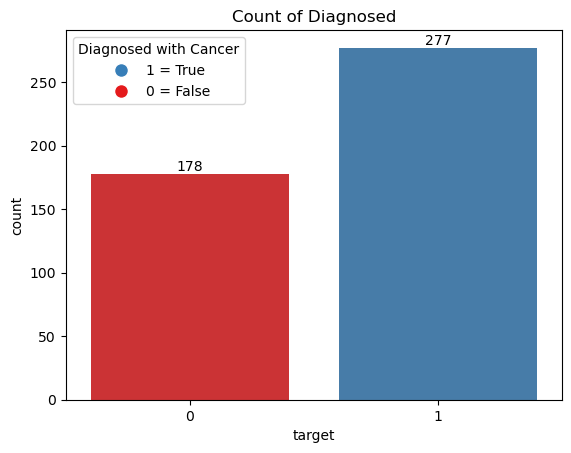

In [6]:
ax = sns.countplot(data=train_set, x='target', palette='Set1')

plt.title('Count of Diagnosed')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('Set1')[1], markersize=10, label='1 = True'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('Set1')[0], markersize=10, label='0 = False')
], title='Diagnosed with Cancer')

for p in ax.patches:
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

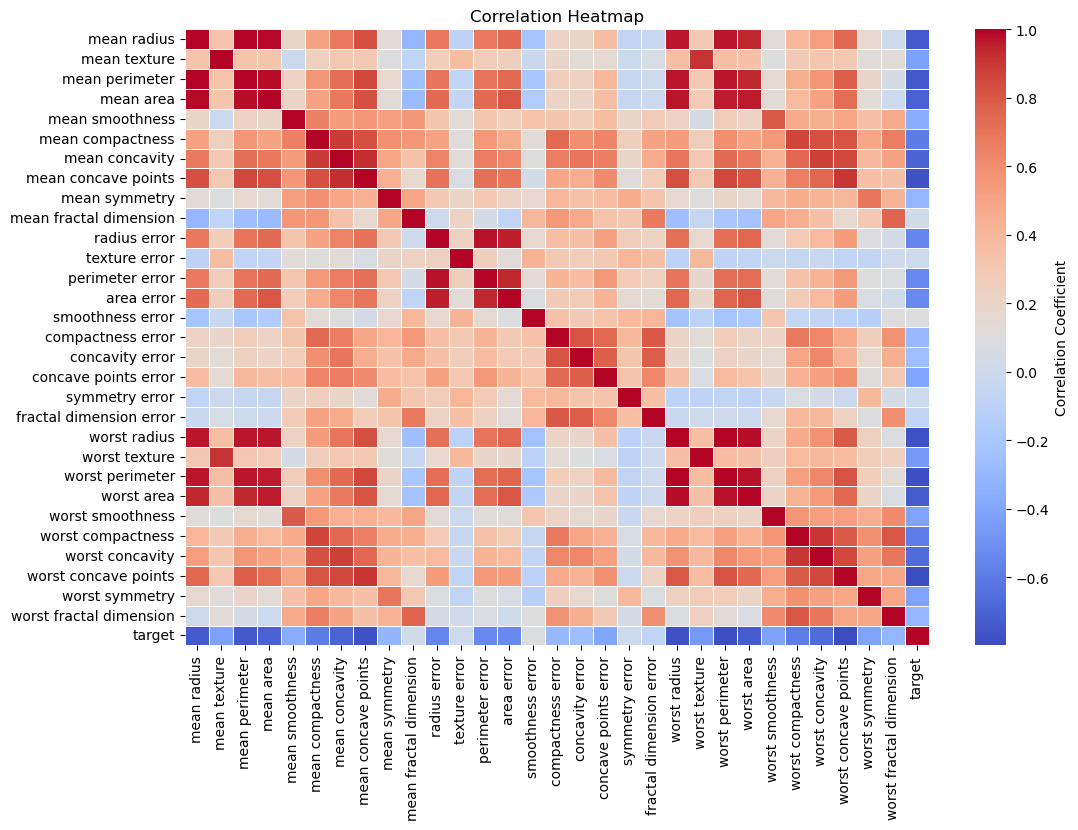

In [7]:
corr = train_set.corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Correlation Coefficient')
plt.show()

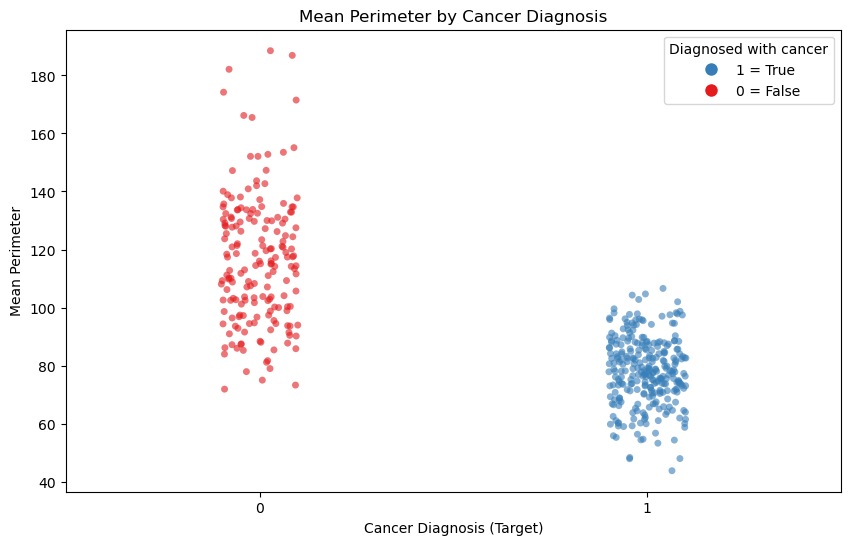

In [8]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=train_set, x='target', y='mean perimeter', jitter=True, alpha=0.6, palette='Set1')
plt.title('Mean Perimeter by Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis (Target)')
plt.ylabel('Mean Perimeter')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('Set1')[1], markersize=10, label='1 = True'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('Set1')[0], markersize=10, label='0 = False')
], title='Diagnosed with cancer')
plt.show()

In [9]:
train_set.var()

mean radius                    13.056255
mean texture                   18.161516
mean perimeter                621.138268
mean area                  132923.776114
mean smoothness                 0.000190
mean compactness                0.002904
mean concavity                  0.006580
mean concave points             0.001578
mean symmetry                   0.000778
mean fractal dimension          0.000048
radius error                    0.087250
texture error                   0.263407
perimeter error                 4.634560
area error                   2419.531291
smoothness error                0.000009
compactness error               0.000337
concavity error                 0.000876
concave points error            0.000038
symmetry error                  0.000070
fractal dimension error         0.000007
worst radius                   24.789273
worst texture                  37.821112
worst perimeter              1198.214621
worst area                 352956.531386
worst smoothness

## Part 3 - Experiments
You could add as many code cells as needed

<h1 style="color: #6A9C89">5 fold cross validation with grid search and Feature Engineering</h1>

<h3 style="color: #6A9C89">Splitting the train set</h3>

In [10]:
X_train = train_set.iloc[: , :-1]
y_train = train_set.iloc[: , -1]

<h3 style="color: #6A9C89">Cross validation with Grid Search Results and Best Parameters Highlighting</h3>

In [11]:
params = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Naive_Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'Logistic_Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear'],
        'classifier__max_iter': [100, 200, 300]
    }
}

feature_engineering = {
    'Variance Threshold': VarianceThreshold(threshold=0.0001),
    'No Scaling': FunctionTransformer(),
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler()
}

pipelines = {
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    'Naive_Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ]),
    'Logistic_Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(solver='liblinear'))
    ])
}

f1 = make_scorer(f1_score)

all_results = []

for name, trans in feature_engineering.items():
    for model_name, pipeline in pipelines.items():
        full_pipeline = Pipeline([
            ('feature_engineering', trans),
            ('classifier', pipeline.named_steps['classifier'])
        ])
        
        grid_search = GridSearchCV(estimator=full_pipeline, param_grid=params[model_name], scoring=f1, cv=5, n_jobs=-1,)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        all_results.append({
            'Model': model_name,
            'Best Params': best_params,
            'Feature Engineering': name,
            'f1 score': best_score
        })

final_results_df = pd.DataFrame(all_results)
final_results_df = final_results_df.sort_values(by='f1 score', ascending=False)
best_params  = final_results_df.iloc[0]['Best Params']
best_Model  = final_results_df.iloc[0]['Model']
best_FE = final_results_df.iloc[0]['Feature Engineering']

def highlight_best_row(s):
    return ['background-color: #C96868' if s.name == final_results_df.index[0] else '' for _ in s]

final_results_df = final_results_df.style.apply(highlight_best_row, axis=1)
display(final_results_df)

,Model,Best Params,Feature Engineering,f1 score
8,Logistic_Regression,"{'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}",Standard Scaling,0.980433
11,Logistic_Regression,"{'classifier__C': 100, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}",Min-Max Scaling,0.975025
9,KNN,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}",Min-Max Scaling,0.973385
6,KNN,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}",Standard Scaling,0.973322
2,Logistic_Regression,"{'classifier__C': 100, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}",Variance Threshold,0.965793
5,Logistic_Regression,"{'classifier__C': 10, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}",No Scaling,0.964087
1,Naive_Bayes,{'classifier__var_smoothing': 1e-08},Variance Threshold,0.951202
4,Naive_Bayes,{'classifier__var_smoothing': 1e-08},No Scaling,0.951202
0,KNN,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}",Variance Threshold,0.950448
3,KNN,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}",No Scaling,0.950448


In [12]:
print('The best result we got is:')
print('Model: ' + best_Model)
print('Hyperparameters: ' + str(best_params))
print('Feature Engineering: ' + best_FE)

The best result we got is:
Model: Logistic_Regression
Hyperparameters: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}
Feature Engineering: Standard Scaling


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [13]:
X_train = train_set.iloc[: , :-1]
X_test = test_set.iloc[: , :-1]
y_train = train_set.iloc[: , -1]
y_test = test_set.iloc[: , -1]

In [14]:
log_reg = LogisticRegression(C=0.1, solver='liblinear', max_iter = 100)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', log_reg)
])

pipeline.fit(X_train, y_train)

pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.1, solver='liblinear'))])

## Part 5 - Apply on test and show model performance estimation

In [15]:
y_pred = pipeline.predict(X_test)

In [16]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print("First 5 Predictions:")
display(comparison_df.head())

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

First 5 Predictions:


,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.99      1.00      0.99        80

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy: 99.12%
